In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 222
np.random.seed(SEED)

dataFrame = pd.read_csv("E:\project\python\machineLearning\ML_BeiFeng\data\house-votes-84.csv")
dataFrame.head()

,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_train_date(df,test_size=0.3):
    # 分出训练集和测试集
    y = 1 * (df.Class_Name == "republican")
    X = df.drop(columns=["Class_Name"])
    # 将离散型特征的每一种取值都看成一种状态，
    # 若你的这一特征中有N个不相同的取值，那么我们就可以将该特征抽象成N种不同的状态
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

x_train, x_test, y_train, y_test = get_train_date(dataFrame)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(304, 48)
(304,)
(131, 48)
(131,)


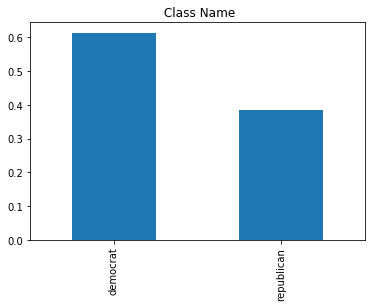

In [20]:
dataFrame.Class_Name.value_counts(normalize=True)\
    .plot(kind = "bar", title=" Class Name")
plt.show()

In [21]:
#pip install pydotplus
import pydotplus

from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False,
        out_file = None,
        feature_names = feature_names,
        class_names={0:"D", 1:"R"},
        filled = True,
        rounded = True
    )

    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

 ROC-AUC score : 0.982


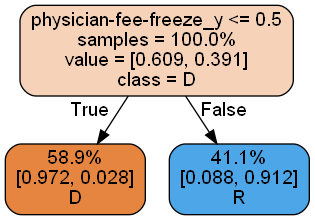

In [22]:
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(x_train, y_train)
p = t1.predict_proba(x_test)[:, 1]

print(" ROC-AUC score : %.3f" % roc_auc_score(y_test, p))
print_graph(t1, x_train.columns)

 ROC-AUC score : 0.987


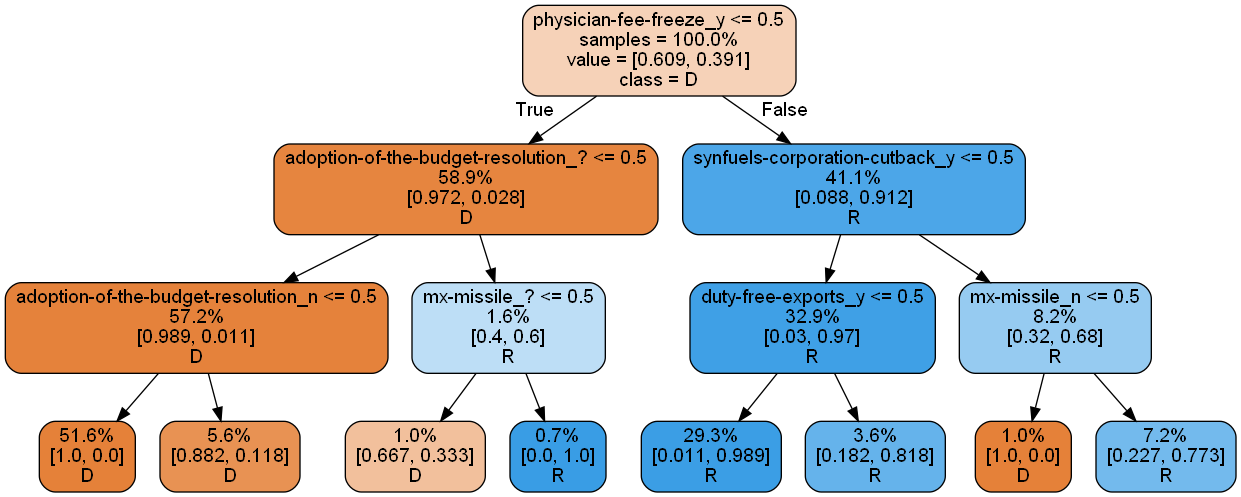

In [25]:
t1 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t1.fit(x_train, y_train)
p = t1.predict_proba(x_test)[:, 1]

print(" ROC-AUC score : %.3f" % roc_auc_score(y_test, p))
print_graph(t1, x_train.columns)

In [26]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(
    n_estimators=10,
    max_features=3,
    random_state=SEED
)

randomForestClassifier.fit(x_train, y_train)
p = randomForestClassifier.predict_proba(x_test)[:, 1]
print(" ROC-AUC score : %.3f" % roc_auc_score(y_test, p))

 ROC-AUC score : 0.996
